In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [37]:
data = pd.read_csv('Tesla.csv+-+Tesla.csv.csv')
data

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Adj Close'}>]], dtype=object)

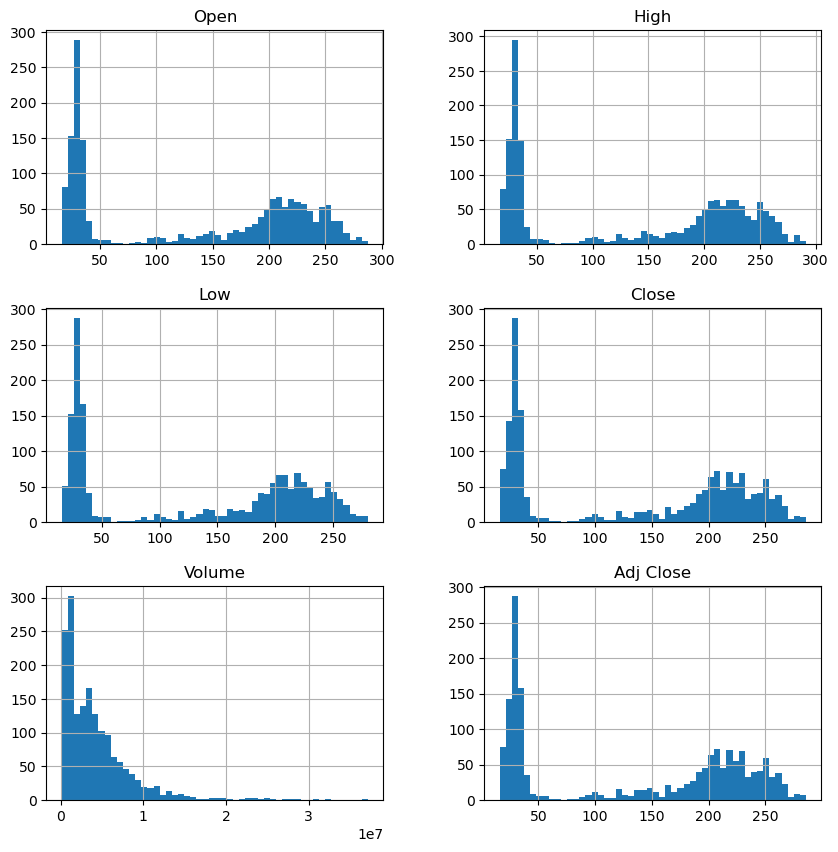

In [38]:
data.hist(bins=50,figsize=(10,10))

In [39]:
data.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [40]:
data.shape

(1692, 7)

In [41]:
data["HL_Perc"] = (data["High"]-data["Low"]) / data["Low"] * 100
data["CO_Perc"] = (data["Close"] - data["Open"]) / data["Open"] * 100

In [42]:
dates = np.array(data["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [43]:
data = data[["HL_Perc", "CO_Perc", "Adj Close", "Volume"]]

In [44]:
data["PriceNextMonth"] = data["Adj Close"].shift(-30)

/var/folders/qj/fxsf77sd1p38mdc08b1lfqrr0000gn/T/ipykernel_82312/2528685257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["PriceNextMonth"] = data["Adj Close"].shift(-30)


In [45]:
data.tail()

,HL_Perc,CO_Perc,Adj Close,Volume,PriceNextMonth
1687,1.676418,0.551422,246.169998,3010700,NaN
1688,4.918296,4.831173,258.000000,7575500,NaN
1689,2.646791,-0.494165,255.729996,4816600,NaN
1690,2.582414,-0.133386,262.049988,7100400,NaN
1691,1.581154,-0.946970,261.500000,6475900,NaN


In [46]:
X = np.array(data.drop(columns="PriceNextMonth", axis=1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
data.dropna(inplace = True)
y = np.array(data["PriceNextMonth"])

/var/folders/qj/fxsf77sd1p38mdc08b1lfqrr0000gn/T/ipykernel_82312/1143149755.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace = True)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [48]:
model = RandomForestRegressor()

In [49]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [50]:
accurancy = model.score(X_test, y_test)
print(accurancy)

0.9612426006129763


In [51]:
model.fit(X,y)

RandomForestRegressor()

In [55]:
predictions = model.predict(X_Check)
predictions

array([233.61470594, 241.86619828, 252.69100103, 245.22839872,
       242.32890021, 234.02120097, 233.76620147, 231.06089854,
       241.12860185, 245.59940148, 247.97970156, 239.51319781,
       235.64400162, 219.7255001 , 244.52460038, 217.48589696,
       239.04489779, 231.2889998 , 237.4121023 , 256.49660162,
       263.48470464, 231.81290068, 243.11139881, 240.92239697,
       256.82000004, 241.84360154, 227.77690178, 243.51609966,
       240.11189943, 250.81660014])

In [53]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = data["Adj Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

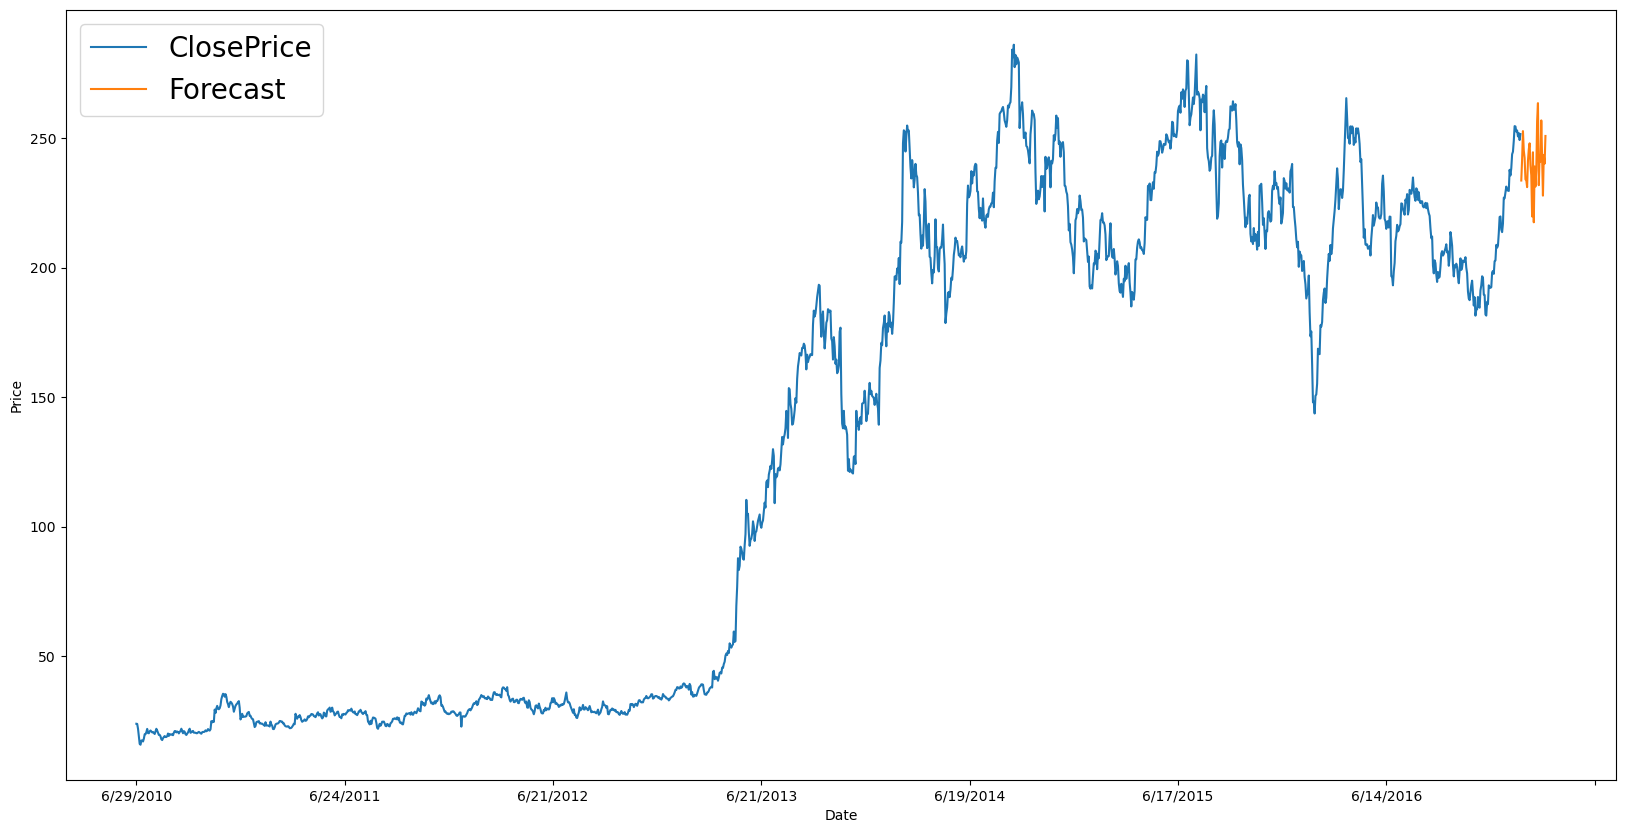

In [54]:
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')